In [1]:
import pandas as pd

order_table = pd.read_table("season_1/training_data/order_data/order_data_2016-01-01", names=['order_id', 'driver_id', 
               'passenger_id', 'depart_id', 'dest_id', 'price', 'time'], parse_dates=[6])

In [2]:
import numpy as np
import datetime

time_slot = np.zeros((order_table.shape[0],),np.int)
jour = np.zeros((order_table.shape[0],), datetime.date)
for i, t in enumerate(order_table['time']):
    time_slot[i] = t.time().hour*6+t.time().minute/10
    jour[i] = t.date()

In [3]:
order_table['time_slot']=time_slot
order_table['jour']=jour

1

In [4]:
region_table = pd.read_table("season_1/training_data/cluster_map/cluster_map", index_col=0, names=['hash', 'id'])

In [14]:
type(Out[13])

pandas.core.series.Series

In [15]:
region_table.loc['f2c8c4bb99e6377d21de71275afd6cd2', 'id']

2

In [18]:
order_table.shape

(501287, 9)

In [32]:
order_table['depart_id'] = order_table['depart_id'].apply(lambda x: region_table.ix[x, 'id'])

In [60]:
rst = order_table.groupby(by=['jour', 'depart_id', 'time_slot']).size()

In [47]:
import numpy as np

valid_table = order_table[pd.notnull(order_table['driver_id'])]

In [49]:
valid_table.groupby(by=['depart_id', 'time_slot']).size()

depart_id  time_slot
1          0            178
           1            191
           2            182
           3            167
           4            152
           5            131
           6            127
           7            128
           8            114
           9            105
           10            70
           11            70
           12            60
           13            67
           14            56
           15            73
           16            53
           17            47
           18            50
           19            40
           20            39
           21            31
           22            37
           23            22
           24            17
           25            23
           26            24
           27            16
           28            17
           29            12
                       ... 
66         114           11
           115           17
           116           16
           117           13

In [6]:
order_table_list = []
for d in datelist:
    order_table = pd.read_table("season_1/training_data/order_data/order_data_"+d.isoformat(), 
                                names=['order_id', 'driver_id', 'passenger_id', 'depart_id', 'dest_id', 'price', 'time'], 
                                parse_dates=[6])
    time_slot = np.zeros((order_table.shape[0],),np.int)
    jour = np.zeros((order_table.shape[0],), date)
    for i, t in enumerate(order_table['time']):
        time_slot[i] = t.time().hour*6+t.time().minute/10
        jour[i] = t.date()
    order_table['time_slot']=time_slot
    order_table['jour']=jour
    order_table['depart_id'] = order_table['depart_id'].apply(lambda x: region_table.ix[x, 'id'])
    order_table_list.append(order_table)

In [7]:
order_table = pd.concat(order_table_list).loc[:,['jour', 'depart_id', 'time_slot', 'order_id', 'driver_id']]

In [4]:
f = order_table.groupby(by=['jour', 'depart_id', 'time_slot'], as_index=False).count()

In [1]:
import pandas as pd
from datetime import date, timedelta

startdate = date(2016, 1 ,1)
datelist = [startdate+timedelta(days=i) for i in xrange(0,21)]


In [2]:
import numpy as np


weatherlist = []
for d in datelist:
    weather = pd.read_table("season_1/training_data/weather_data/weather_data_"+d.isoformat(), 
                            names=['time','weather','temperature','pm'], parse_dates=[0])
    time_slot = np.zeros((weather.shape[0],),np.int)
    jour = np.zeros((weather.shape[0],), date)
    for i, t in enumerate(weather['time']):
        time_slot[i] = t.time().hour*6+t.time().minute/10
        jour[i] = t.date()
    weather['slot'] = time_slot
    weather['jour'] = jour
    weatherlist.append(weather)

In [3]:
weather_feature = np.zeros((21*144, 9), dtype = np.float)
grouped_weatherlist = pd.concat(weatherlist).groupby(['jour', 'slot'])
for i in xrange(21):
    for j in xrange(144):
        try:
            rec = grouped_weatherlist.get_group((date(2016,1, 1+i), j))
            for k in xrange(rec.shape[0]):
                weather_feature[i*144+j, rec.iloc[k,1]-1] += 1.0/rec.shape[0]
        except KeyError:
            continue;

In [4]:
b = -1
for e in xrange(weather_feature.shape[0]+1):
    if e==weather_feature.shape[0] or not np.all(weather_feature[e,:]==0.0):
        if e==weather_feature.shape[0]:
            if b!=e-1:
                for i in xrange(b+1, e):
                    weather_feature[i, :] = weather_feature[b, :]
            else:
                break;

        if not np.all(weather_feature[e,:]==0.0) and b!=e-1:
            r = e-b+0.0
            for i in xrange(b+1, e):
                weather_feature[i, :] = (e-i)/r*weather_feature[b, :] + (i-b)/r*weather_feature[e, :]
        elif b==-1 and b!=e-1:
            for i in xrange(b+1, e):
                weather_feature[i, :] = weather_feature[e, :]
        b=e

In [56]:
f

,jour,depart_id,time_slot,order_id,driver_id
0,2016-01-01,1,0,187,178
1,2016-01-01,1,1,198,191
2,2016-01-01,1,2,192,182
3,2016-01-01,1,3,172,167
4,2016-01-01,1,4,153,152
5,2016-01-01,1,5,132,131
6,2016-01-01,1,6,133,127
7,2016-01-01,1,7,130,128
8,2016-01-01,1,8,120,114
9,2016-01-01,1,9,111,105


In [11]:
gf = f.groupby(['jour', 'depart_id', 'time_slot'])

In [12]:
from datetime import timedelta

dd = timedelta(days=7)
t = f.ix[0, 'jour']-dd


In [16]:
gf.get_group((date(2016,1,1), 2, 33))

,jour,depart_id,time_slot,order_id,driver_id
170,2016-01-01,2,33,2,1


In [63]:
f.ix[0, 'jour']<f.ix[160000, 'jour']

True

In [40]:
flst = []
# generate time feature
for i in xrange(f.shape[0]):
    x = [(f.ix[i, 'time_slot'], 1), (144+f.ix[i, 'time_slot']/6, 1), (168+f.ix[i, 'jour'].weekday()/5, 1)]
    flst.append(x)

In [41]:
# generate region feature
for i in xrange(f.shape[0]):
    flst[i].append((170+f.ix[i, 'depart_id']-1, 1))

In [42]:
# generate customer feature
from datetime import timedelta

dd = timedelta(days=7)
for i in xrange(f.shape[0]):
    bd = f.ix[i, 'jour']-dd
    try:
        rec = gf.get_group((bd, f.ix[i, 'depart_id'], f.ix[i, 'time_slot']))
        flst[i].append((236, rec.iloc[0, 3]-rec.iloc[0, 4]))
        flst[i].append((237, np.log(1+rec.iloc[0, 3])))
        flst[i].append((238, np.log(1+rec.iloc[0, 4])))
        if rec.iloc[0, 3]==rec.iloc[0, 4]: flst[i].append((239, 1))
    except KeyError:
        continue;

In [52]:
flst[108504]

[(142, 1),
 (167, 1),
 (168, 1),
 (235, 1),
 (236, 0),
 (237, 1.791759469228055),
 (238, 1.791759469228055),
 (239, 1),
 (242, 1.0)]

In [54]:
f.ix[108504,:]

jour         2016-01-14
depart_id            66
time_slot           142
order_id              6
driver_id             6
Name: 108504, dtype: object

In [55]:
weather_feature[]

,time,weather,temperature,pm,slot,jour
0,2016-01-21 07:06:27,4,1.0,49,42,2016-01-21
1,2016-01-21 07:16:44,4,1.0,49,43,2016-01-21
2,2016-01-21 07:32:28,4,1.0,49,45,2016-01-21
3,2016-01-21 07:51:38,4,1.0,50,47,2016-01-21
4,2016-01-21 08:12:29,4,1.0,50,49,2016-01-21
5,2016-01-21 08:58:10,4,1.0,49,53,2016-01-21
6,2016-01-21 09:22:50,4,1.0,49,56,2016-01-21
7,2016-01-21 09:47:31,4,1.0,49,58,2016-01-21
8,2016-01-21 19:04:38,4,1.0,44,114,2016-01-21
9,2016-01-21 19:26:20,4,1.0,44,116,2016-01-21


In [37]:
rec.iloc[0, 3]

7

In [46]:
np.nonzero(weather_feature[-1,:])

(array([1]),)

In [48]:
weather_feature.shape

(3024, 9)

In [51]:
# weather feature
for i in xrange(f.shape[0]):
    wf = weather_feature[f.ix[i, 'time_slot']+144*(f.ix[i, 'jour'].day-1), :]
    for idx in np.nonzero(wf)[0]:
        flst[i].append((240+idx, wf[idx]))

In [50]:
f.ix[i, 'jour'].day

1

In [56]:
weather_feature[2016:2116,:]

array([[ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  1. ,  0. ,  0. ,  0. ,  0. ,  0. ,

In [58]:
with open("training_data", 'w') as fw:
    for i, features in enumerate(flst):
        s = '{0} {1} '.format(f.ix[i, 'order_id'], f.ix[i, 'driver_id'])
        for idx, val in features:
            if val!=0: s+='{0}:{1} '.format(idx, val)
        s+='\n'
        fw.write(s)

visualization

In [10]:
import pandas as pd
import numpy as np
import datetime


region_table = pd.read_table("season_1/training_data/cluster_map/cluster_map", index_col=0, names=['hash', 'id'])

order_table = pd.read_table("season_1/training_data/order_data/order_data_2016-01-01", names=['order_id', 'driver_id', 
               'passenger_id', 'depart_id', 'dest_id', 'price', 'time'], parse_dates=[6])
time_slot = np.zeros((order_table.shape[0],),np.int)
jour = np.zeros((order_table.shape[0],), datetime.date)
for i, t in enumerate(order_table['time']):
    time_slot[i] = t.time().hour*6+t.time().minute/10
    jour[i] = t.date()
order_table['time_slot']=time_slot
order_table['jour']=jour
order_table['depart_id'] = order_table['depart_id'].apply(lambda x: region_table.ix[x, 'id'])
order_table = order_table.loc[:,['jour', 'depart_id', 'time_slot', 'order_id', 'driver_id']]
f = order_table.groupby(by=['jour', 'depart_id', 'time_slot'], as_index=False).count()

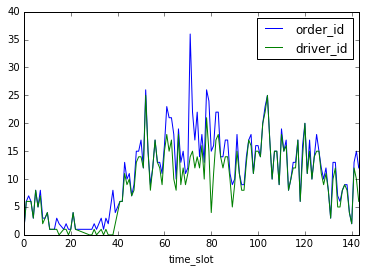

In [27]:
%matplotlib notebook

f[f['depart_id']==13].plot(x='time_slot', y=['order_id', 'driver_id'])

In [5]:
import numpy as np
order_table_list = []
for d in datelist:
    order_table = pd.read_table("season_1/training_data/order_data/order_data_"+d.isoformat(), 
                                names=['order_id', 'driver_id', 'passenger_id', 'depart_id', 'dest_id', 'price', 'time'], 
                                parse_dates=[6])
    time_slot = np.zeros((order_table.shape[0],),np.int)
    jour = np.zeros((order_table.shape[0],), date)
    for i, t in enumerate(order_table['time']):
        time_slot[i] = t.time().hour*6+t.time().minute/10
        jour[i] = t.date()
    order_table['time_slot']=time_slot
    order_table['jour']=jour
    order_table['depart_id'] = order_table['depart_id'].apply(lambda x: region_table.ix[x, 'id'])
    order_table_list.append(order_table)
order_table = pd.concat(order_table_list).loc[:,['jour', 'depart_id', 'time_slot', 'order_id', 'driver_id']]
f = order_table.groupby(by=['jour', 'depart_id', 'time_slot'], as_index=False).count()

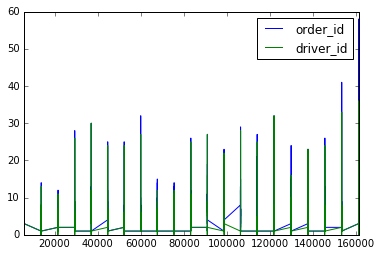

In [33]:
f[f['depart_id']==45].plot(y=['order_id', 'driver_id'])

<IPython.core.display.Javascript object>


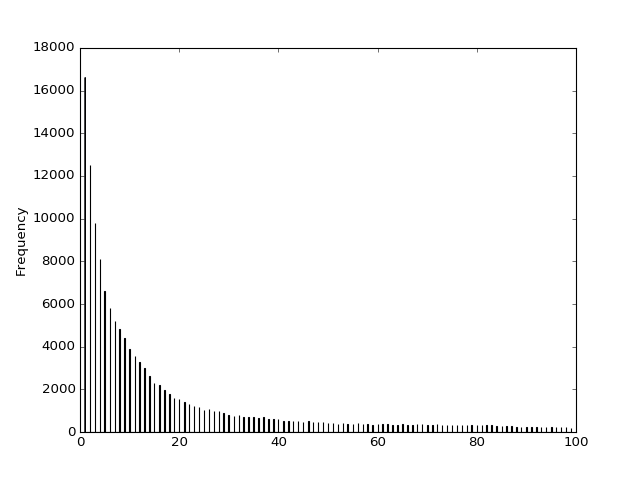

In [31]:
f[f['order_id']<100]['order_id'].plot.hist(bins=1000)

In [17]:
f[f['jour']>date(2016,1,3)]['order_id'].max()

1863

In [18]:
f[f['order_id']==1863]

,jour,depart_id,time_slot,order_id,driver_id
161938,2016-01-21,51,103,1863,648


In [23]:
gap = f['order_id']-f['driver_id']

<IPython.core.display.Javascript object>


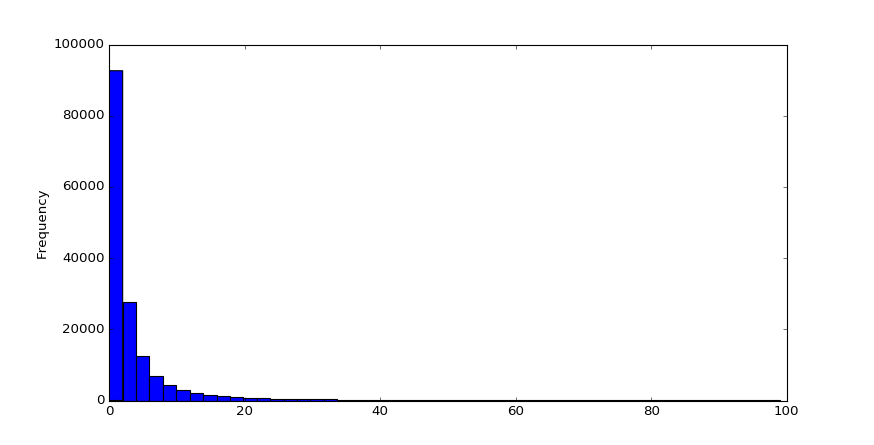

In [32]:
gap[gap<100].plot.hist(bins=50)

In [1]:
from feature_generation import *

In [2]:
weather_feature = weather_feature_generation("season_1/training_data", total_datelist)
# get region table
train_order = refine_order_list("season_1/training_data", train_datelist+validation_datelist)
total_grouped_train_order = train_order.groupby(['jour', 'depart_id', 'time_slot'])


In [5]:
flst = training_data_generation(train_order, total_grouped_train_order, weather_feature)

In [3]:
weather_feature = weather_feature_generation("season_1/test_set_1/", test_datelist)
flst = test_data_generation("season_1/test_set_1/read_me_1.txt", total_grouped_train_order, weather_feature)

In [4]:
len(flst)

2838